In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import matplotlib.colors as mcolors
# Load data from CSV
filename = "/home/pablo/pablo-diaz/out/Lille_0/Lille_0-2025-03-24-15:06:31.csv"
df = pd.read_csv(filename)
norm = mcolors.Normalize(vmin=-100, vmax=100)
colormap = cm.get_cmap("viridis")
# Plot points
def plot_cloud(category, tolerance):
    """Plots a 3D point cloud for a given category and tolerance."""
    subset = df[(df["upper"] == category) & (df["tolerance"] == tolerance)]
    print(f"Tolerance {tolerance} with bound {category} size: {subset.size}")
    # Create figure and 3D axis
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the subset
    tol = tolerance if category != "lower" else -tolerance
    color = colormap(norm(tol))
    ax.scatter(subset["x"], subset["y"], subset["z"], c=[color], marker="o", s=2)

    # Labels and title
    ax.set_xlabel("X Coordinate")
    ax.set_ylabel("Y Coordinate")
    ax.set_zlabel("Z Coordinate")
    ax.set_title(f"3D Point Cloud - Tolerance: {tolerance}, Bound: {category}")

    return fig  # Return figure object

/tmp/ipykernel_7380/3519711298.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap("viridis")


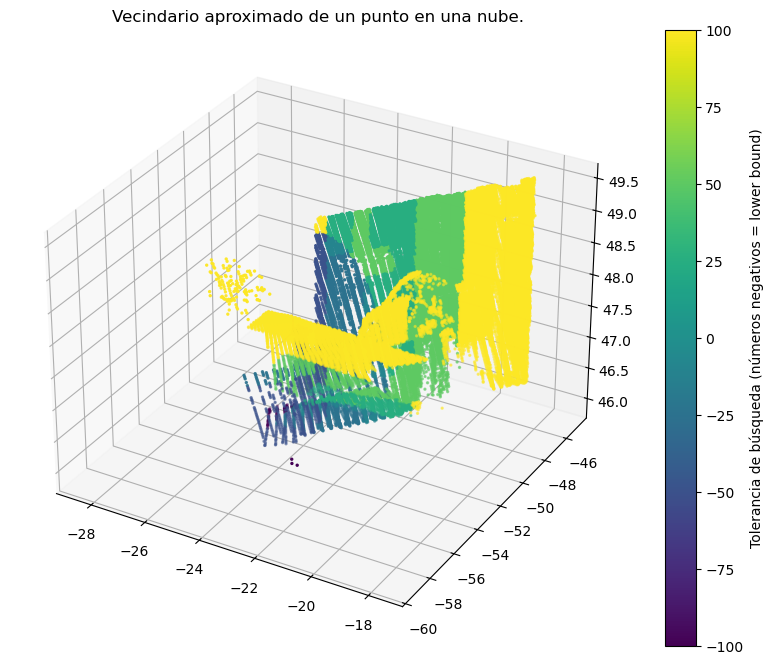

In [39]:
def plot_approx_neighbors(df_approx):
    # invert tolerances for lower bound
    df_approx.loc[df_approx["upper"] == "lower", "tolerance"] *= -1

    seen_points = set()
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    for tol in sorted(df_approx["tolerance"].unique()):
        subset = df_approx[df_approx["tolerance"] == tol]
        points = {tuple(row[["x", "y", "z"]]) for _, row in subset.iterrows()}
        new_points = points - seen_points
        seen_points.update(new_points)
        if new_points:
            color = colormap(norm(tol))
            ax.scatter(*zip(*new_points), c=[color] * len(new_points), s=2)   
         
    ax.set_title("")

    # Add colorbar for reference
    sm = cm.ScalarMappable(cmap=colormap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=ax, label="Tolerancia de búsqueda (números negativos = lower bound)")
    plt.title("Vecindario aproximado de un punto en una nube.")
    # Show plot
    plt.show()
plot_approx_neighbors(df.copy())

In [40]:

def plot_search_cloud():

    # Get tolerance range
    min_tol, max_tol = df["tolerance"].min(), df["tolerance"].max()
    
    # Viridis colormap mapped from -100 to 100
    norm = mcolors.Normalize(vmin=-100, vmax=100)
    colormap = cm.get_cmap("viridis")

    # Track seen points
    seen_points = set()

    # Prepare plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Process `upper == lower` (Map tolerance range to [-100, 0])
    for tol in sorted(df["tolerance"].unique(), reverse=True):
        subset = df[(df["upper"] == "lower") & (df["tolerance"] == tol)]
        new_points = [tuple(row[["x", "y", "z"]]) for _, row in subset.iterrows() if tuple(row[["x", "y", "z"]]) not in seen_points]
        seen_points.update(new_points)

        if new_points:
            mapped_tol = -100 + (tol - min_tol) / (max_tol - min_tol) * 100  # Scale from [-100, 0]
            color = colormap(norm(mapped_tol))
            ax.scatter(*zip(*new_points), c=[color] * len(new_points), s=2)

    # Process `upper == exact` (Tolerance == 0)
    subset = df[(df["upper"] == "exact") & (df["tolerance"] == 0.0)]
    new_points = [tuple(row[["x", "y", "z"]]) for _, row in subset.iterrows() if tuple(row[["x", "y", "z"]]) not in seen_points]
    seen_points.update(new_points)

    if new_points:
        color = colormap(norm(0))  # Exact is mapped to 0
        ax.scatter(*zip(*new_points), c=[color] * len(new_points), s=2)

    # Process `upper == upper` (Map tolerance range to [0, 100])
    for tol in sorted(df["tolerance"].unique()):  # Ascending order
        subset = df[(df["upper"] == "upper") & (df["tolerance"] == tol)]
        new_points = [tuple(row[["x", "y", "z"]]) for _, row in subset.iterrows() if tuple(row[["x", "y", "z"]]) not in seen_points]
        seen_points.update(new_points)

        if new_points:
            mapped_tol = (tol - min_tol) / (max_tol - min_tol) * 100  # Scale from [0, 100]
            color = colormap(norm(mapped_tol))
            ax.scatter(*zip(*new_points), c=[color] * len(new_points), s=2)

    # Labels & Colorbar
    ax.set_xlabel("X Coordinate")
    ax.set_ylabel("Y Coordinate")
    ax.set_zlabel("Z Coordinate")
    ax.set_title("3D Search Cloud with Viridis Gradient (-100 to 100)")

    # Add colorbar for reference
    sm = cm.ScalarMappable(cmap=colormap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=ax, label="Search Tolerance (-100: lower, 0: exact, 100: upper)")

    # Show plot
    plt.show()
# plot_search_cloud()

Tolerance 0.0 with bound exact size: 25115
Tolerance 25 with bound lower size: 20550
Tolerance 50 with bound lower size: 6200
Tolerance 100 with bound lower size: 450
Tolerance 25 with bound upper size: 43705
Tolerance 50 with bound upper size: 91695
Tolerance 100 with bound upper size: 207985


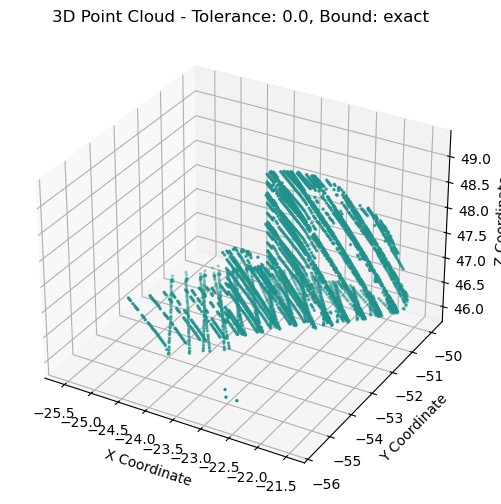

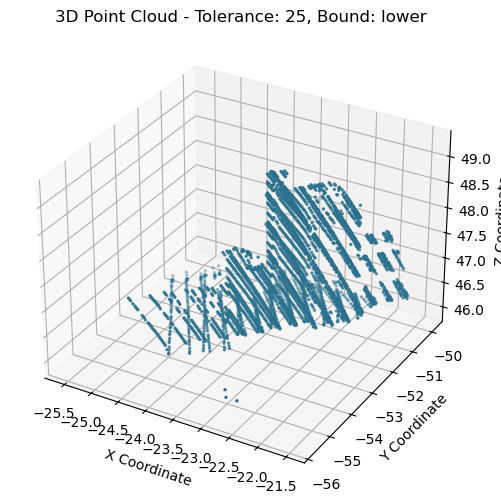

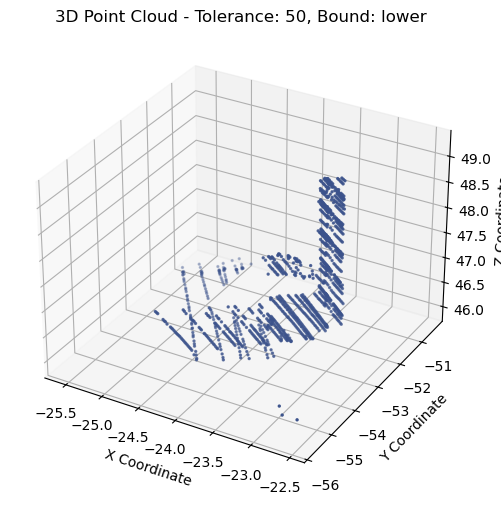

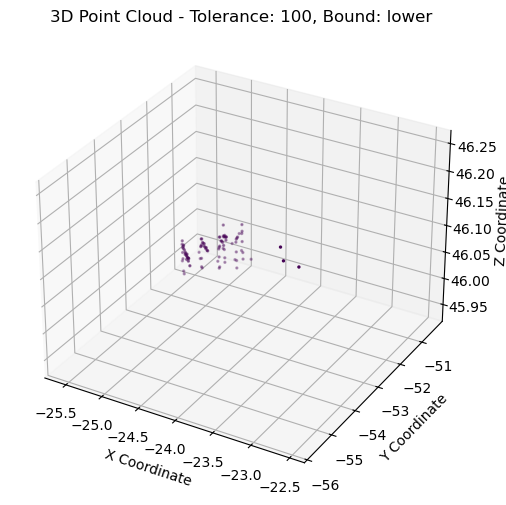

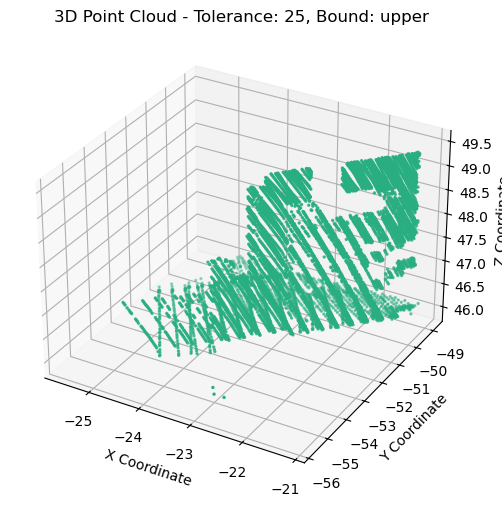

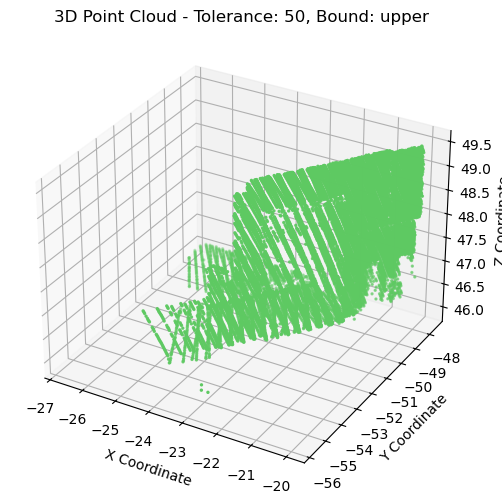

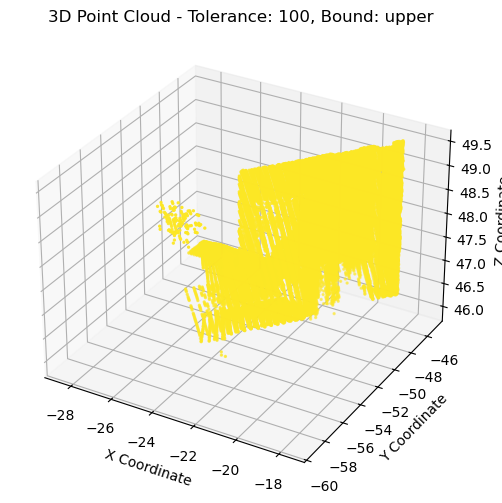

In [44]:
fig = plot_cloud("exact", 0.0)
fig = plot_cloud("lower", 25)
fig = plot_cloud("lower", 50)
fig = plot_cloud("lower", 100)
fig = plot_cloud("upper", 25)
fig = plot_cloud("upper", 50)
fig = plot_cloud("upper", 100)